## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0803 18:37:02.692536  7044 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 18:37:02.764536  7044 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 18:37:02.780539  7044 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0803 18:37:03.099250  7044 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0803 18:37:03.126128  7044 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0803 18:37:03.415237  7044 deprecation.py:323] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0803 18:37:03.569016  7044 deprecation_wrapper.py:119] From c:\users\susan01\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 22s 449us/step - loss: 1.9617 - acc: 0.2951 - val_loss: 1.7821 - val_acc: 0.3653
Epoch 2/100
50000/50000 [==============================] - 21s 421us/step - loss: 1.7185 - acc: 0.3876 - val_loss: 1.6497 - val_acc: 0.4115
Epoch 3/100
50000/50000 [==============================] - 22s 434us/step - loss: 1.6146 - acc: 0.4257 - val_loss: 1.5644 - val_acc: 0.4414
Epoch 4/100
50000/50000 [==============================] - 21s 423us/step - loss: 1.5505 - acc: 0.4491 - val_loss: 1.5160 - val_acc: 0.4596
Epoch 5/100
50000/50000 [==============================] - 21s 421us/step - loss: 1.5034 - acc: 0.4634 - val_loss: 1.5099 - val_acc: 0.4627
Epoch 6/100
50000/50000 [==============================] - 21s 424us/step - loss: 1.4674 - acc: 0.4753 - val_loss: 1.4925 - val_acc: 0.4695
Epoch 7/100
50000/50000 [==============================] - 21s 422us/step - loss: 1.4330 - acc: 0.4918 - val_l

Epoch 59/100
50000/50000 [==============================] - 23s 457us/step - loss: 0.5131 - acc: 0.8163 - val_loss: 2.0821 - val_acc: 0.5217
Epoch 60/100
50000/50000 [==============================] - 23s 464us/step - loss: 0.5016 - acc: 0.8208 - val_loss: 2.0879 - val_acc: 0.5140
Epoch 61/100
50000/50000 [==============================] - 23s 464us/step - loss: 0.5158 - acc: 0.8150 - val_loss: 2.0794 - val_acc: 0.5143
Epoch 62/100
50000/50000 [==============================] - 22s 436us/step - loss: 0.4943 - acc: 0.8234 - val_loss: 2.1217 - val_acc: 0.5093
Epoch 63/100
50000/50000 [==============================] - 22s 446us/step - loss: 0.4922 - acc: 0.8224 - val_loss: 2.1815 - val_acc: 0.5118
Epoch 64/100
50000/50000 [==============================] - 23s 451us/step - loss: 0.4848 - acc: 0.8253 - val_loss: 2.1503 - val_acc: 0.5208
Epoch 65/100
50000/50000 [==============================] - 23s 463us/step - loss: 0.4600 - acc: 0.8353 - val_loss: 2.2350 - val_acc: 0.5156
Epoch 66/100


In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [11]:
train, test = keras.datasets.cifar10.load_data()
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [13]:
model2 = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model2.summary()

sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=sgd)
model2.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 18s 368us/step - loss: 

50000/50000 [==============================] - 17s 348us/step - loss: 0.4250 - acc: 0.8503 - val_loss: 2.0448 - val_acc: 0.5127
Epoch 51/100
50000/50000 [==============================] - 18s 364us/step - loss: 0.4031 - acc: 0.8589 - val_loss: 1.9532 - val_acc: 0.5398
Epoch 52/100
50000/50000 [==============================] - 18s 356us/step - loss: 0.3982 - acc: 0.8585 - val_loss: 2.0735 - val_acc: 0.5152
Epoch 53/100
50000/50000 [==============================] - 19s 387us/step - loss: 0.3759 - acc: 0.8665 - val_loss: 2.0165 - val_acc: 0.5388
Epoch 54/100
50000/50000 [==============================] - 18s 365us/step - loss: 0.3582 - acc: 0.8738 - val_loss: 2.0567 - val_acc: 0.5276
Epoch 55/100
50000/50000 [==============================] - 18s 360us/step - loss: 0.3516 - acc: 0.8761 - val_loss: 2.3491 - val_acc: 0.5075
Epoch 56/100
50000/50000 [==============================] - 18s 355us/step - loss: 0.3514 - acc: 0.8767 - val_loss: 2.1366 - val_acc: 0.5271
Epoch 57/100
50000/50000 [

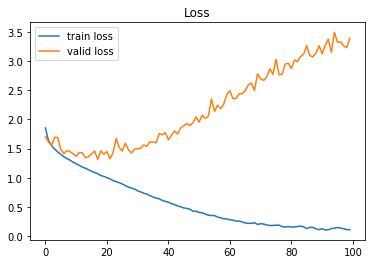

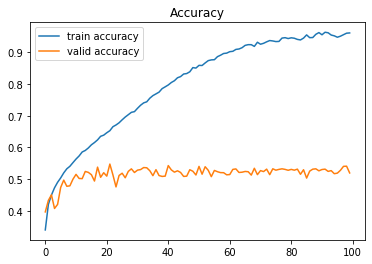

In [14]:

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()